## Our Mission ##

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'. 

In this mission we will be using the Naive Bayes algorithm to create a model that can classify SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Often they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the human recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else. Also, this is a supervised learning problem, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions. 

# Overview

This project has been broken down in to the following steps: 

- Step 1.1: Understanding our dataset
- Step 1.2: Data Preprocessing
- Step 2.1: Bag of Words (BoW)
- Step 2.3: Implementing Bag of Words in scikit-learn
- Step 3.1: Training and testing sets
- Step 3.2: Applying Bag of Words processing to our dataset.
- Step 5: Naive Bayes implementation using scikit-learn
- Step 6: Evaluating our model
- Step 7: Conclusion

### Step 0: Introduction to the Naive Bayes Theorem ###

Bayes Theorem is one of the earliest probabilistic inference algorithms. It was developed by Reverend Bayes (which he used to try and infer the existence of God no less), and still performs extremely well for certain use cases. 

It's best to understand this theorem using an example. Let's say you are a member of the Secret Service and you have been deployed to protect the Democratic presidential nominee during one of his/her campaign speeches. Being a public event that is open to all, your job is not easy and you have to be on the constant lookout for threats. So one place to start is to put a certain threat-factor for each person. So based on the features of an individual, like age, whether the person is carrying a bag, looks nervous, etc., you can make a judgment call as to whether that person is a viable threat. 

If an individual ticks all the boxes up to a level where it crosses a threshold of doubt in your mind, you can take action and remove that person from the vicinity. Bayes Theorem works in the same way, as we are computing the probability of an event (a person being a threat) based on the probabilities of certain related events (age, presence of bag or not, nervousness of the person, etc.). 

One thing to consider is the independence of these features amongst each other. For example if a child looks nervous at the event then the likelihood of that person being a threat is not as much as say if it was a grown man who was nervous. To break this down a bit further, here there are two features we are considering, age AND nervousness. Say we look at these features individually, we could design a model that flags ALL persons that are nervous as potential threats. However, it is likely that we will have a lot of false positives as there is a strong chance that minors present at the event will be nervous. Hence by considering the age of a person along with the 'nervousness' feature we would definitely get a more accurate result as to who are potential threats and who aren't. 

This is the 'Naive' bit of the theorem where it considers each feature to be independent of each other which may not always be the case and hence that can affect the final judgement.

In short, Bayes Theorem calculates the probability of a certain event happening (in our case, a message being spam) based on the joint probabilistic distributions of certain other events (in our case, the appearance of certain words in a message). We will dive into the workings of Bayes Theorem later in the mission, but first, let us understand the data we are going to work with.

### Step 1.1: Understanding our dataset ### 


We will be using a dataset originally compiled and posted on the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. If you're interested, you can review the [abstract](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) and the original [compressed data file](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/) on the UCI site. For this exercise, however, we've gone ahead and downloaded the data for you.

The columns in the data set are currently not named and as you can see, there are 2 columns. 

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam. 

The second column is the text content of the SMS message that is being classified.

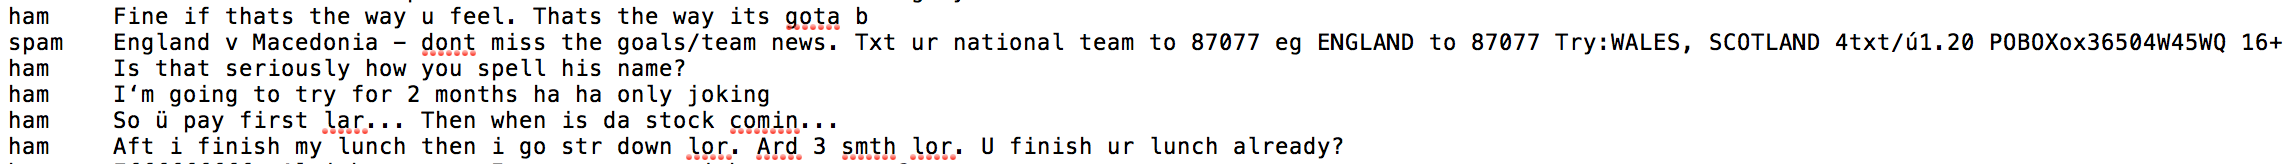

>**Instructions:**
* Import the dataset into a pandas dataframe using the **read_table** method. The file has already been downloaded, and you can access it using the filepath 'smsspamcollection/SMSSpamCollection'. Because this is a tab separated dataset we will be using '\\t' as the value for the 'sep' argument which specifies this format. 
* Also, rename the column names by specifying a list ['label', 'sms_message'] to the 'names' argument of read_table().
* Print the first five values of the dataframe with the new column names.

In [4]:
'''
Solution
'''
import pandas as pd
# Dataset available using filepath 'SMSSpamCollection'
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'sms_message'])

# Output printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 1.2: Data Preprocessing ###

Now that we have a basic understanding of what our dataset looks like, let's convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation. 

You might be wondering why do we need to do this step? The answer to this lies in how scikit-learn handles inputs. Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values). 

Our model would still be able to make predictions if we left our labels as strings but we could have issues later when calculating performance metrics, for example when calculating our precision and recall scores. Hence, to avoid unexpected 'gotchas' later, it is good practice to have our categorical values be fed into our model as integers. 

>**Instructions:**
* Convert the values in the 'label' column to numerical values using map method as follows:
{'ham':0, 'spam':1} This maps the 'ham' value to 0 and the 'spam' value to 1.
* Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 
'shape'.

In [5]:
'''
Solution
'''
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.1: Bag of Words ###

What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. 

Here we'd like to introduce the Bag of Words (BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter. 

Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word (token) being the column, and the corresponding (row, column) values being the frequency of occurrence of each word or token in that document.

For example: 

Let's say we have 4 documents, which are text messages
in our case, as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Our objective here is to convert this set of texts to a frequency distribution matrix, as follows:

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Let's break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearn's 
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string (separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrence of each of those tokens.

**Please Note:** 

* The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the `lowercase` parameter which is by default set to `True`.

* It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the `token_pattern` parameter which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

* The third parameter to take note of is the `stop_words` parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the', etc. By setting this parameter value to `english`, CountVectorizer will automatically ignore all words (from our input text) that are found in the built in list of English stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.

We will dive into the application of each of these into our model in a later step, but for now it is important to be aware of such preprocessing techniques available to us when dealing with textual data.

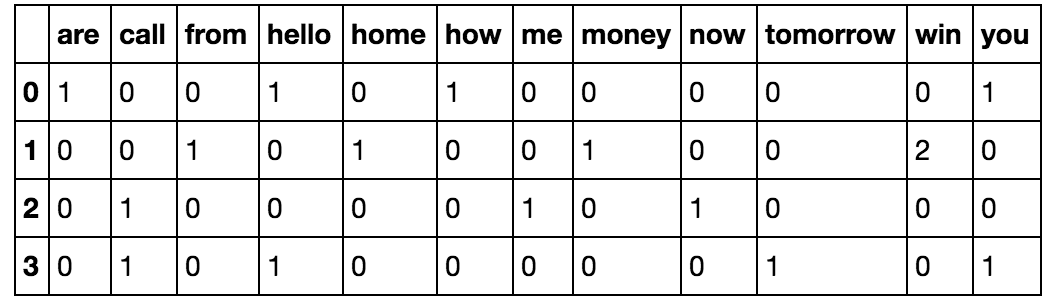

### Step 2.3: Implementing Bag of Words in scikit-learn ###

In [6]:
'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the 
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

>>**Instructions:**
Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'. 

In [7]:
'''
Solution
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

**Data preprocessing with CountVectorizer()**

This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words defined in scikit-learn. Considering the small size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not use stop words, and we won't be setting this parameter value.


>>**Instructions:**
Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words 
which have been categorized as features using the get_feature_names() method.

In [8]:
'''
Solution
'''
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

>>**Instructions:**
Create a matrix with each row representing one of the 4 documents, and each column representing a word (feature name). 
Each value in the matrix will represent the frequency of the word in that column occurring in the particular document in that row. 
You can do this using the transform() method of CountVectorizer, passing in the document data set as the argument. The transform() method returns a matrix of NumPy integers, which you can convert to an array using
toarray(). Call the array 'doc_array'.


In [9]:
'''
Solution
'''
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

>>**Instructions:**
Convert the 'doc_array' we created into a dataframe, with the column names as the words (feature names). Call the dataframe 'frequency_matrix'.


In [10]:
'''
Solution
'''
frequency_matrix = pd.DataFrame(doc_array, columns=count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


Congratulations! You have successfully implemented a Bag of Words problem for a document dataset that we created. 

One potential issue that can arise from using this method is that if our dataset of text is extremely large (say if we have a large collection of news articles or email data), there will be certain values that are more common than others simply due to the structure of the language itself. For example, words like 'is', 'the', 'an', pronouns, grammatical constructs, etc., could skew our matrix and affect our analyis. 

There are a couple of ways to mitigate this. One way is to use the `stop_words` parameter and set its value to `english`. This will automatically ignore all the words in our input text that are found in a built-in list of English stop words in scikit-learn.

Another way of mitigating this is by using the [tfidf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) method. This method is out of scope for the context of this lesson.

### Step 3.1: Training and testing sets ###

Now that we understand how to use the Bag of Words approach, we can return to our original, larger UCI dataset and proceed with our analysis. Our first step is to split our dataset into a training set and a testing set so we can first train, and then test our model. 


>>**Instructions:**
Split the dataset into a training and testing set using the train_test_split method in sklearn, and print out the number of rows we have in each of our training and testing data. Split the data
using the following variables:
* `X_train` is our training data for the 'sms_message' column.
* `y_train` is our training data for the 'label' column
* `X_test` is our testing data for the 'sms_message' column.
* `y_test` is our testing data for the 'label' column. 


In [11]:
'''
Solution
'''
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


### Step 3.2: Applying Bag of Words processing to our dataset. ###

Now that we have split the data, our next objective is to follow the steps from "Step 2: Bag of Words," and convert our data into the desired matrix format. To do this we will be using CountVectorizer() as we did before. There are two  steps to consider here:

* First, we have to fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.
* Secondly, we have to transform our testing data (`X_test`) to return the matrix. 

Note that `X_train` is our training data for the 'sms_message' column in our dataset and we will be using this to train our model. 

`X_test` is our testing data for the 'sms_message' column and this is the data we will be using (after transformation to a matrix) to make predictions on. We will then compare those predictions with `y_test` in a later step. 


In [18]:
'''
Solution
'''
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(lowercase = True, token_pattern = '(?u)\\b\\w\\w+\\b')

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [19]:
training_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Step 5: Naive Bayes implementation using scikit-learn ###

Now let's return to our spam classification context. Thankfully, sklearn has several Naive Bayes implementations that we can use, so we do not have to do the math from scratch. We will be using sklearn's `sklearn.naive_bayes` method to make predictions on our SMS messages dataset. 

Specifically, we will be using the multinomial Naive Bayes algorithm. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand, Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian (normal) distribution.

In [14]:
'''
Instructions:

We have loaded the training data into the variable 'training_data' and the testing data into the 
variable 'testing_data'.

Import the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier
'naive_bayes'. You will be training the classifier using 'training_data' and 'y_train' from our split earlier. 
'''

"\nInstructions:\n\nWe have loaded the training data into the variable 'training_data' and the testing data into the \nvariable 'testing_data'.\n\nImport the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier\n'naive_bayes'. You will be training the classifier using 'training_data' and 'y_train' from our split earlier. \n"

In [20]:
'''
Solution
'''
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [ ]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''

In [21]:
'''
Solution
'''
predictions = naive_bayes.predict(testing_data)

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

### Step 6: Evaluating our model ###

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, so first let's review them.

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all positives (all words classified as spam, regardless of whether that was the correct classification). In other words, precision is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all the words that were actually spam. In other words, recall is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case - for example if we had 100 text messages and only 2 were spam and the other 98 weren't - accuracy by itself is not a very good metric. We could classify 90 messages as not spam (including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the **F1 score**, which is the weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 of these metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [ ]:
'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''

In [22]:
'''
Solution
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


### Step 7: Conclusion ###

One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning its parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 
It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle. All in all, Naive Bayes' really is a gem of an algorithm!